In [1]:
import pickle
from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2


## Raw Accelerometer Data obtained from Smartwatch

In [2]:
reload_smartwatch_p = False

In [3]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True)
    smartwatch_loader_p.load_data(verbose=True, autocalib_tol=10e-15)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

100%|██████████| 479/479 [00:00<00:00, 38876.73it/s]


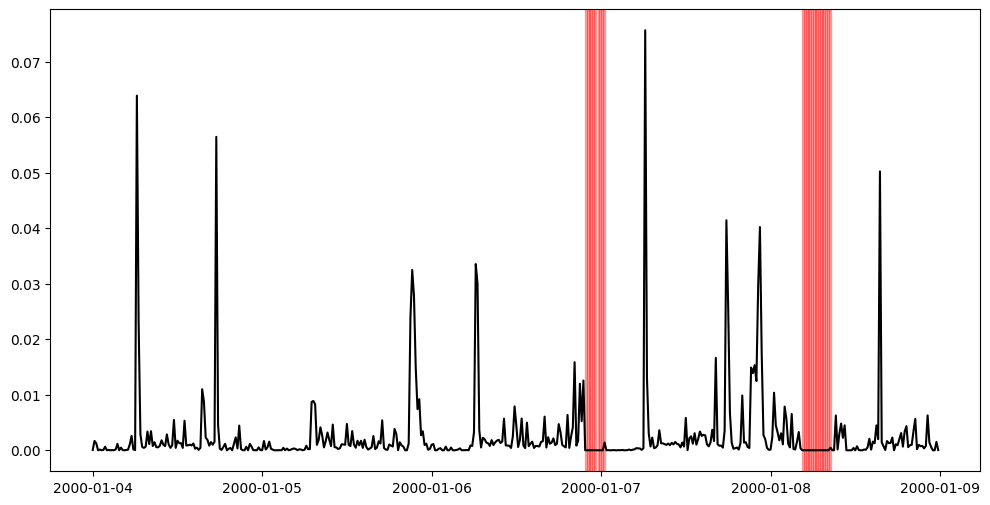

In [4]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 55291.39it/s]


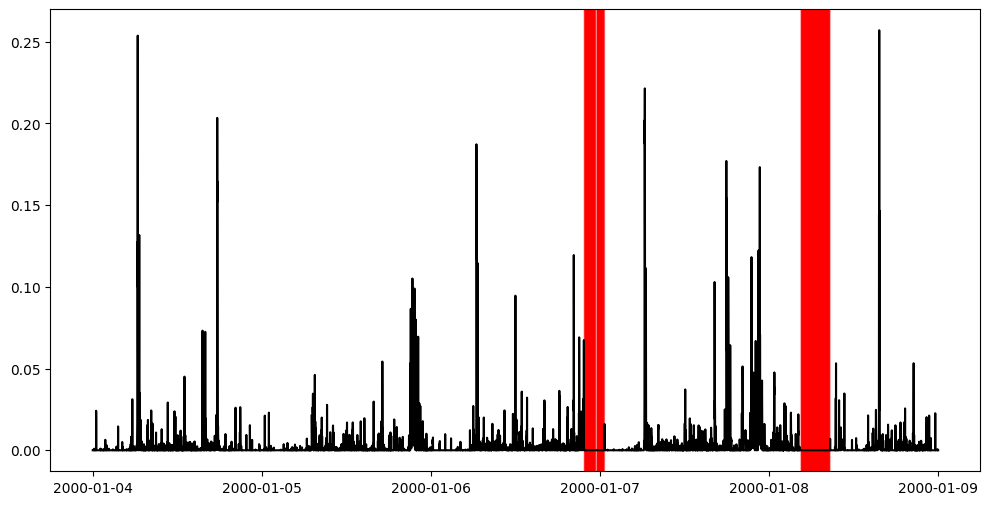

In [5]:
smartwatch_loader_p.plot_enmo()

In [6]:
smartwatch_loader_p.get_meta_data()

{'initial calibration error': 0.019900845583211396,
 'final calibration error': 0.00426933094260819,
 'offset': array([ 0.0280229 , -0.04103817, -0.01399065]),
 'scale': array([0.99644409, 0.99894598, 0.99920414]),
 'total time': 431999.9875,
 'wear time': 411491.25,
 'non-wear time': 20508.73749999999}

In [7]:
reload_smartwatch = False

In [8]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

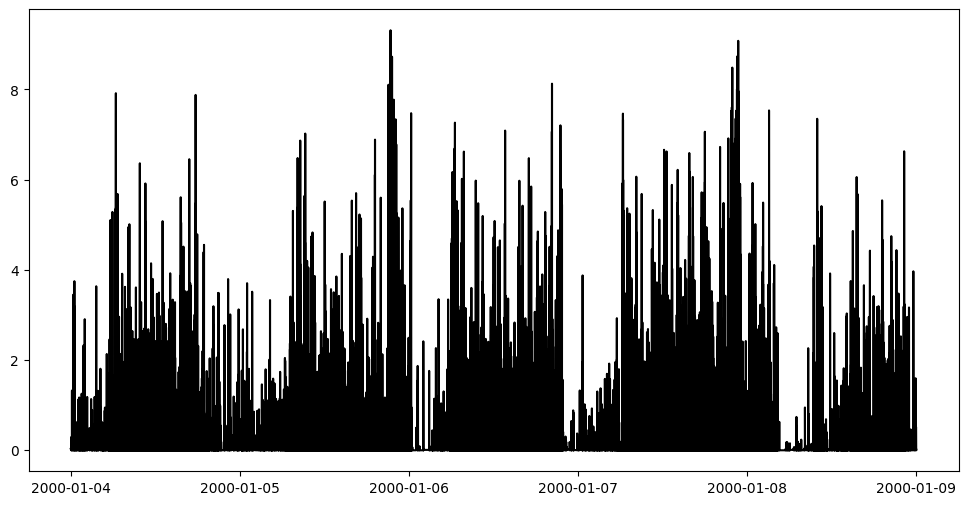

In [9]:
smartwatch_loader.plot_orig_enmo(wear=False)

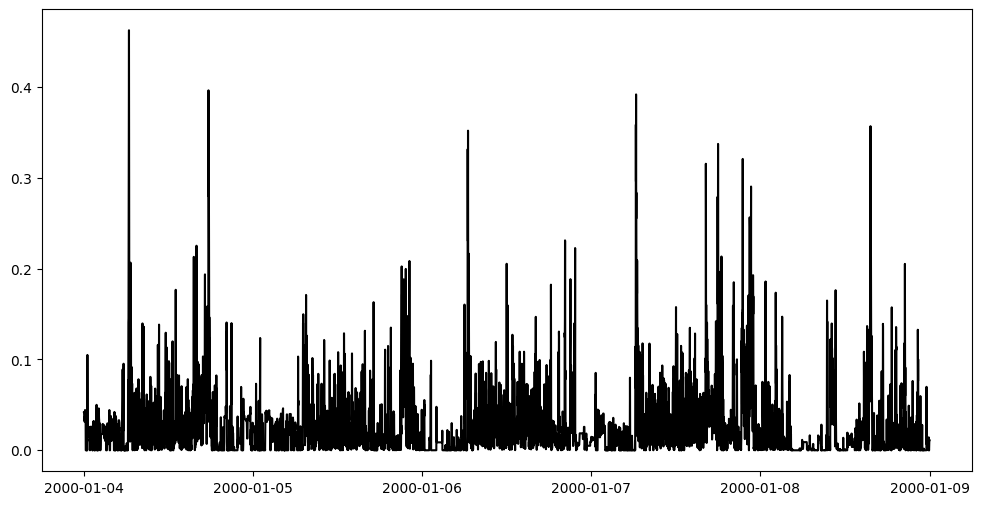

In [10]:
smartwatch_loader.plot_enmo()


In [11]:
smartwatch_loader.get_meta_data()

{}

## ENMO Data obtained from UK-Biobank

In [12]:
reload_biobank = False

In [13]:
if reload_biobank:
    biobank_loader = DataLoader(datasource='uk-biobank', input_path='../data/62164.csv', preprocess=True)
    biobank_loader.load_data(verbose=True)
    with open("loader_biobank.pkl", "wb") as file:
        pickle.dump(biobank_loader, file)
else:
    with open("loader_biobank.pkl", "rb") as file:
        biobank_loader = pickle.load(file)

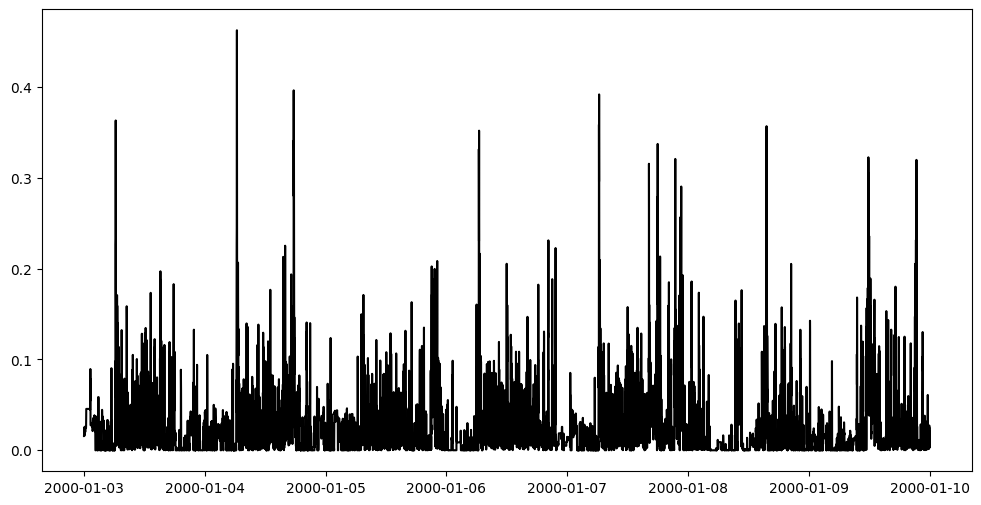

In [14]:
biobank_loader.plot_enmo()

In [15]:
biobank_loader.get_meta_data()

{}

## Compute features

In [24]:
features_p = WearableFeatures(smartwatch_loader_p)
features_p.get_IV()
features_p.get_IS()
features_p.get_RA()
features_p.get_M10()
features_p.get_L5()
features_p.get_M10_start()
features_p.get_L5_start()
features_p.get_SB()
features_p.get_LIPA()
features_p.get_MVPA()
features_p.get_WASO()
features_p.get_TST()
features_p.get_PTA()
features_p.get_SRI()
_, cosinor_out = features_p.get_cosinor_features()


In [28]:
features_p.get_all()

,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,WASO,TST,PTA,SRI
2000-01-04,0.451265,0.189880,0.951308,0.005526,6,0.000138,2,13.700000,9.383333,0.916667,439.0,250.0,0.347222,NaN
2000-01-05,1.075714,0.602783,0.935593,0.004970,21,0.000165,2,12.216667,10.266667,1.516667,731.0,345.0,0.239583,29.166667
2000-01-06,0.772922,0.347926,0.974574,0.004812,6,0.000062,22,10.900000,11.950000,1.150000,876.0,393.0,0.272917,28.611111
2000-01-07,0.750507,0.154711,0.981498,0.009494,22,0.000089,2,10.500000,11.400000,2.100000,481.0,376.0,0.261111,63.333333
2000-01-08,1.302505,0.436482,0.977179,0.003945,15,0.000046,5,15.400000,7.550000,1.050000,NaN,NaN,NaN,-7.916667


In [29]:
features_p.get_enmo_data()

,ENMO,wear,sleep_predictions
TIMESTAMP,,,
2000-01-04 00:00:00,0.0,1.0,1
2000-01-04 00:01:00,0.0,1.0,1
2000-01-04 00:02:00,0.0,1.0,1
2000-01-04 00:03:00,0.0,1.0,1
2000-01-04 00:04:00,0.0,1.0,1
...,...,...,...
2000-01-08 23:55:00,0.0,1.0,1
2000-01-08 23:56:00,0.0,1.0,1
2000-01-08 23:57:00,0.0,1.0,1


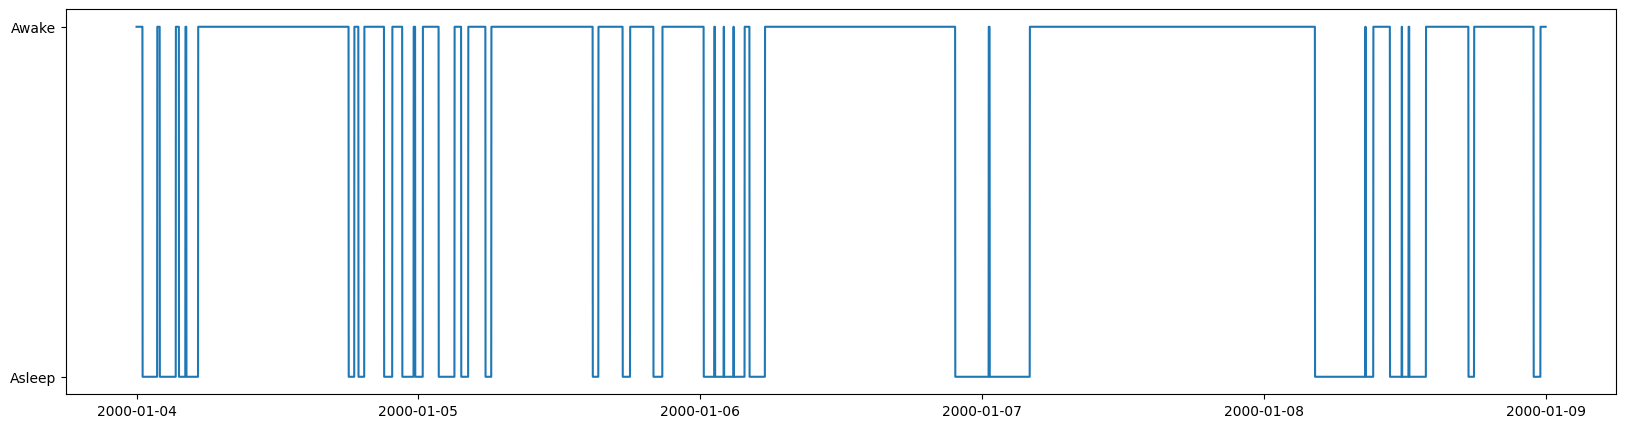

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(features_p.get_enmo_data()["sleep_predictions"])
plt.yticks([0, 1], ["Asleep", "Awake"])
plt.show()


In [31]:
print(cosinor_out)

{'MESOR': 0.0027456860493853376, 'amp': 0.0007829054441726969, 'acr': 1.1972258867213723, 'acrotime': 19.426933971137185, 'ndays': 5}
